In [1]:
import numpy as np
import torch
import pandas as pd
from torch import nn
from d2l import torch as d2l

In [2]:
train_data = pd.read_csv('./california-house-prices/train.csv')
test_data = pd.read_csv('./california-house-prices/test.csv')
print(train_data.shape)
print(test_data.shape)

(47439, 41)
(31626, 40)


In [3]:
[i for i in train_data.columns if i not in test_data.columns ]

['Sold Price']

In [5]:
test_data.columns,train_data.columns

(Index(['Id', 'Address', 'Summary', 'Type', 'Year built', 'Heating', 'Cooling',
        'Parking', 'Lot', 'Bedrooms', 'Bathrooms', 'Full bathrooms',
        'Total interior livable area', 'Total spaces', 'Garage spaces',
        'Region', 'Elementary School', 'Elementary School Score',
        'Elementary School Distance', 'Middle School', 'Middle School Score',
        'Middle School Distance', 'High School', 'High School Score',
        'High School Distance', 'Flooring', 'Heating features',
        'Cooling features', 'Appliances included', 'Laundry features',
        'Parking features', 'Tax assessed value', 'Annual tax amount',
        'Listed On', 'Listed Price', 'Last Sold On', 'Last Sold Price', 'City',
        'Zip', 'State'],
       dtype='object'),
 Index(['Id', 'Address', 'Sold Price', 'Summary', 'Type', 'Year built',
        'Heating', 'Cooling', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms',
        'Full bathrooms', 'Total interior livable area', 'Total spaces',
        'Gar

In [6]:
all_features = pd.concat((train_data.iloc[:,4:-1],test_data.iloc[:,3:-1]))
all_features.shape

(79065, 36)

In [21]:
train_data.loc[0]

Id                                                                             0
Address                                                              540 Pine Ln
Sold Price                                                             3825000.0
Summary                        540 Pine Ln, Los Altos, CA 94022 is a single f...
Type                                                                SingleFamily
Year built                                                                1969.0
Heating                             Heating - 2+ Zones, Central Forced Air - Gas
Cooling                          Multi-Zone, Central AC, Whole House / Attic Fan
Parking                                       Garage, Garage - Attached, Covered
Lot                                                                          1.0
Bedrooms                       Ground Floor Bedroom, Master Bedroom on Ground...
Bathrooms                                                                    0.0
Full bathrooms              

In [24]:
miss_values_count = all_features.isnull().sum()
miss_values_count.loc[miss_values_count > 0]

Year built                      1942
Heating                        12207
Cooling                        30144
Parking                         2325
Lot                            22989
Bedrooms                        4598
Bathrooms                       5410
Full bathrooms                 12928
Total interior livable area     3878
Total spaces                    1667
Garage spaces                   1667
Region                             2
Elementary School               8493
Elementary School Score         8735
Elementary School Distance      8493
Middle School                  28277
Middle School Score            28279
Middle School Distance         28277
High School                     7174
High School Score               7784
High School Distance            7175
Flooring                       21936
Heating features               13392
Cooling features               32117
Appliances included            23753
Laundry features               20789
Parking features                7278
T

In [25]:
all_features = all_features.fillna(method = 'bfill',axis = 0).fillna(0)

In [26]:
miss_values_count = all_features.isnull().sum()
miss_values_count.loc[miss_values_count > 0]

Series([], dtype: int64)

In [27]:
all_features.columns

Index(['Type', 'Year built', 'Heating', 'Cooling', 'Parking', 'Lot',
       'Bedrooms', 'Bathrooms', 'Full bathrooms',
       'Total interior livable area', 'Total spaces', 'Garage spaces',
       'Region', 'Elementary School', 'Elementary School Score',
       'Elementary School Distance', 'Middle School', 'Middle School Score',
       'Middle School Distance', 'High School', 'High School Score',
       'High School Distance', 'Flooring', 'Heating features',
       'Cooling features', 'Appliances included', 'Laundry features',
       'Parking features', 'Tax assessed value', 'Annual tax amount',
       'Listed On', 'Listed Price', 'Last Sold On', 'Last Sold Price', 'City',
       'Zip'],
      dtype='object')

In [28]:
print(all_features['Last Sold On'].head())

print(all_features['Listed On'].head())

0    2019-08-30
1    2019-08-30
2    2016-08-30
3    2016-08-30
4    2016-06-27
Name: Last Sold On, dtype: object
0    2019-10-24
1    2019-10-16
2    2019-08-25
3    2019-10-24
4    2019-06-07
Name: Listed On, dtype: object


In [29]:
all_features['Last Sold On'] = pd.to_datetime(all_features['Last Sold On'],format = '%Y-%m-%d')
all_features['Listed On'] = pd.to_datetime(all_features['Listed On'],format = '%Y-%m-%d')

In [30]:
print(all_features['Last Sold On'].head())

print(all_features['Listed On'].head())

0   2019-08-30
1   2019-08-30
2   2016-08-30
3   2016-08-30
4   2016-06-27
Name: Last Sold On, dtype: datetime64[ns]
0   2019-10-24
1   2019-10-16
2   2019-08-25
3   2019-10-24
4   2019-06-07
Name: Listed On, dtype: datetime64[ns]


In [31]:
all_features.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('<M8[ns]'), dtype('int64')],
      dtype=object)

In [32]:
numeric_features = all_features.dtypes[all_features.dtypes == 'float64'].index
all_features[numeric_features] = all_features[numeric_features].apply(lambda x:(x-x.mean())/(x.std()))

In [33]:
len(numeric_features)

17

In [34]:
all_features.dtypes[all_features.dtypes == 'object']

Type                   object
Heating                object
Cooling                object
Parking                object
Bedrooms               object
Region                 object
Elementary School      object
Middle School          object
High School            object
Flooring               object
Heating features       object
Cooling features       object
Appliances included    object
Laundry features       object
Parking features       object
City                   object
dtype: object

In [35]:
all_features.dtypes[all_features.dtypes != 'object']

Year built                            float64
Lot                                   float64
Bathrooms                             float64
Full bathrooms                        float64
Total interior livable area           float64
Total spaces                          float64
Garage spaces                         float64
Elementary School Score               float64
Elementary School Distance            float64
Middle School Score                   float64
Middle School Distance                float64
High School Score                     float64
High School Distance                  float64
Tax assessed value                    float64
Annual tax amount                     float64
Listed On                      datetime64[ns]
Listed Price                          float64
Last Sold On                   datetime64[ns]
Last Sold Price                       float64
Zip                                     int64
dtype: object

In [36]:
print(len(all_features['Type'].unique()))
print(len(all_features['Heating'].unique()))
print(len(all_features['Cooling'].unique()))
print(len(all_features['Parking'].unique()))
print(len(all_features['Bedrooms'].unique()))
print(len(all_features['Region'].unique()))
print(len(all_features['Elementary School'].unique()))
print(len(all_features['Middle School'].unique()))
print(len(all_features['High School'].unique()))
print(len(all_features['Flooring'].unique()))
print(len(all_features['Heating features'].unique()))
print(len(all_features['Cooling features'].unique()))
print(len(all_features['Appliances included'].unique()))
print(len(all_features['Laundry features'].unique()))
print(len(all_features['Parking features'].unique()))
print(len(all_features['City'].unique()))

174
2658
909
9911
277
1258
3567
809
921
1738
1761
594
11289
3029
9693
1122


In [37]:
all_features['Type']

0        SingleFamily
1        SingleFamily
2        SingleFamily
3        SingleFamily
4          VacantLand
             ...     
31621    SingleFamily
31622    SingleFamily
31623      VacantLand
31624       Townhouse
31625       Townhouse
Name: Type, Length: 79065, dtype: object

In [39]:
features = list(numeric_features)
features.append('Type') # 加上类别数较少的Type
print(features)
print(len(features))

['Year built', 'Lot', 'Bathrooms', 'Full bathrooms', 'Total interior livable area', 'Total spaces', 'Garage spaces', 'Elementary School Score', 'Elementary School Distance', 'Middle School Score', 'Middle School Distance', 'High School Score', 'High School Distance', 'Tax assessed value', 'Annual tax amount', 'Listed Price', 'Last Sold Price', 'Type']
18


In [40]:
all_features = all_features[features]

In [41]:
all_features.shape

(79065, 18)

In [42]:
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(79065, 192)

In [43]:
all_features = all_features.astype(float)
print(all_features.dtypes.unique())

[dtype('float64')]


In [44]:
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values,dtype = torch.float32)
test_features = torch.tensor(all_features[n_train:].values,dtype = torch.float32)
train_labels = torch.tensor(train_data['Sold Price'].values.reshape(-1,1),dtype = torch.float32)

In [45]:
loss = nn.MSELoss()
in_features = train_features.shape[1]

def get_net():
    net = nn.Sequential(nn.Linear(in_features,256), nn.ReLU(), nn.Linear(256,1))  
    
    return net

In [46]:
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    lim_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(lim_preds), torch.log(labels)))
    return rmse.item()

In [47]:
# 把每一个epoch的损失都依次添加到了返回值train_ls, test_ls中
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []   # train_loss和test_loss
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法，对初始学习率没有那么敏感
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate,
                                 weight_decay=weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [48]:
def get_k_fold_data(k, i, X, y):
    assert k>1
    fold_size = X.shape[0] // k
    X_train , y_train = None , None
    for j in range(k):
        idx = slice(j * fold_size,(j + 1) * fold_size )
        X_part , y_part = X[idx, :] , y[idx]
        if j == i:
            X_valid , y_valid = X_part , y_part
        elif X_train is None:
            X_train , y_train = X_part , y_part
        else:
            X_train = torch.cat([X_train,X_part],0)
            y_train = torch.cat([y_train,y_part],0)
    return X_train,y_train,X_valid,y_valid

In [49]:
# 返回训练和验证误差的平均值
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)# 返回一个包含四个元素的元组
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'fold {i + 1}, train log rmse {float(train_ls[-1]):f}, '
              f'valid log rmse {float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

fold 1, train log rmse 0.476943, valid log rmse 0.448756
fold 2, train log rmse 0.475052, valid log rmse 0.451856
fold 3, train log rmse 0.481826, valid log rmse 0.466658
fold 4, train log rmse 0.304746, valid log rmse 0.320898
fold 5, train log rmse 0.449854, valid log rmse 0.543094
5折验证：平均训练log rmse:0.437684,平均验证log rmse:0.446252


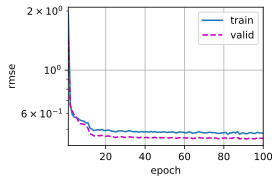

In [50]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 0.1, 128    # 调参数
train_l , valid_l =k_fold(k,train_features,train_labels,num_epochs,lr,weight_decay,batch_size)
print(f'{k}折验证：平均训练log rmse:{float(train_l):f},'
     f'平均验证log rmse:{float(valid_l):f}')

In [51]:
# detach()方法返回一个新的张量，对张量的操作不会影响到原始张量的梯度计算
# .detach() 方法来获取网络的输出，以便进行后续的处理或评估，而不会影响到网络的梯度计算和参数更新。
def train_and_pred(train_features, test_feature, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'train log rmse {float(train_ls[-1]):f}')
    # 将网络应用于测试集。
    preds = net(test_features).detach().numpy()
    # 将其重新格式化以导出到Kaggle
    test_data['Sold Price'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['Sold Price']], axis=1)
    submission.to_csv('submission.csv', index=False)

train log rmse 0.449787


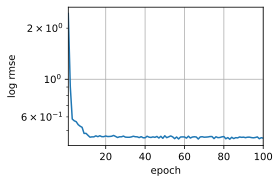

In [52]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)